<a href="https://colab.research.google.com/github/Munenyashaishe/PortfolioOptimization/blob/main/Portfolio_Optimization_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This Program attempts to optimize a user's portfolio using Efficient **Frontier**

**Portfolio optimization** is the process of selecting proportions of various assets to include in a portfolio, in such a way as to make the portfolio better than any other according to specific constraints.

Modern Portfolio Theory (Markowitz, 1952), presumes that in general, investors and/or asset managers seek to strategically maximize a portfolio’s rate of return for a well-defined level of risk. Risk is in this particular set up is simply defined as the standard deviation of the portfolio’s return. 

Furthermore, the concept of optimal or efficient portfolios was introduced to describe portfolios that maximize returns given a specific level of risk.

The efficient frontier allows us to graphically represent a set of optimal portfolios given a specific and well-defined level of risk.

 

*   The main purpose of portfolio optimization is to maximize returns and minimize the risk of a portfolio of assets according to modern portfolio theory (Markowitz, 1952)
*   For investors and asset managers, knowing how much capital needs to be allocated to a particular asset or a basket of assets can statistically make or break a portfolio

*  Modern portfolio theory (Markowitz, 1952) simply formalizes and extends the concept of portfolio diversification

In [ ]:
#Step 1 : IMPORT PYTHON LIBRARIES 
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [9]:
#Step 2 : Get the symbols or stock tickers in the portfolio
# We are going to create a fictional portfolio and attempt to optimize it
# We will use FAANG as a case study (America's most popular tech companies- Facebook, Amazon, Apple, Netflix, Google) 
assets = ['FB', 'AMZN', 'AAPL', 'NFLX' , 'GOOG']

In [ ]:
#Assign weights to the stocks (All stocks need to add up to one or 100%)
#Create Variable Weights and assign equal weights
weights = np.array([0.2 , 0.2, 0.2, 0.2, 0.2])

In [ ]:
#Step 3: Get the stock or portfolio start date
stockStartDate ='2013-01-01'

In [10]:
#Step 4: Get the stocks desired ending date
today = datetime.today().strftime('%Y-%m-%d')
today

'2022-07-03'

# **Fetching and processing data directly from a website using an API**

In [11]:
#Step 5: Create a dataframe to store the adjusted close price of the stocks
#create dataframe called df
df =pd.DataFrame()
#Now we have the dataframe object
#Store the adjusted closing price of the stock into the df (using a loop)
for stock in assets:
  df[stock] = web.DataReader(stock, data_source = 'yahoo', start = stockStartDate, end = today)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
#How to fix remote data error (yahoo api problem)
!pip install yfinance --upgrade --no-cache-dir
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
#Store the adjusted closing price of the stock into the df (using a loop)
for stock in assets:
  df[stock] = web.DataReader(stock, data_source = 'yfinance', start = stockStartDate, end = today)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [14]:
#Show dataframe df (we can see each stock with the adjusted closing price)
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,12.865500,16.914261,13.144286,360.274597
2013-01-03,27.770000,12.924000,16.700766,13.798571,360.483826
2013-01-04,28.760000,12.957500,16.235571,13.711429,367.607117
2013-01-07,29.421301,13.423000,16.140070,14.171429,366.003143
2013-01-08,29.060699,13.319000,16.183504,13.880000,365.280823
...,...,...,...,...,...
2022-06-27,169.490005,113.220001,141.660004,189.139999,2332.449951
2022-06-28,160.679993,107.400002,137.440002,179.600006,2251.429932
2022-06-29,163.940002,108.919998,139.229996,178.360001,2245.129883


## **Data graphical visualization enabled by python library matplotlib**

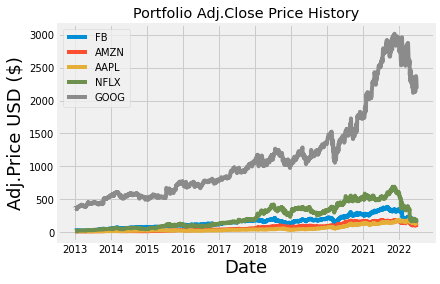

In [15]:
#A visual showcase of the stock / portfolio
#-give graph a title
title = 'Portfolio Adj.Close Price History'
#Get stocks
my_stocks = df

# Create and plot the graph (loop through all columns in the dataset)
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj.Price USD ($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc = 'upper left')
plt.show()


In [16]:
#Show the daily simple return (new price/old price-1)
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022994,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012256,-0.007748,0.002691,-0.020565,-0.001974
...,...,...,...,...,...
2022-06-27,-0.003937,-0.027821,0.000000,-0.008960,-0.016159
2022-06-28,-0.051980,-0.051404,-0.029790,-0.050439,-0.034736
2022-06-29,0.020289,0.014153,0.013024,-0.006904,-0.002798


# **Financial Computations begin**

In [17]:
from numpy.ma.core import multiply
# create and show the annualized covariance matrix (directional relationship between 2 assets prices, how the move together)
# variance how a set of observations diverge from each other
cov_matrix_annual = returns.cov() * 252 #trading days
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.132818,0.062233,0.049489,0.069195,0.056065
AMZN,0.062233,0.100463,0.044379,0.070479,0.051285
AAPL,0.049489,0.044379,0.082221,0.040142,0.041591
NFLX,0.069195,0.070479,0.040142,0.223445,0.052864
GOOG,0.056065,0.051285,0.041591,0.052864,0.068998


In [18]:
# calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
print(port_variance)

0.06733562462172146


In [19]:
#(square root variance) Calculate the portfolio volatility / standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.25949108775008334

In [20]:
# calculate annual portfolio return 
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

0.2801109560106631

In [21]:
# Show the expected annual return, volatility and variance %
# volatility = risk
percent_variance = str(round(port_variance, 2)* 100) + '%'
percent_volatility = str(round(port_volatility, 2)*100) + '%'
percent_return = str(round(portfolioSimpleAnnualReturn, 2)*100) + '%'

print('Expected annual return: '+percent_return)
print('Expected annual volatility/risk: ' +percent_volatility)
print('Expected annual variance: '+percent_variance)

Expected annual return: 28.000000000000004%
Expected annual volatility/risk: 26.0%
Expected annual variance: 7.000000000000001%


In [22]:
#Improve perfomance by making adjustments to the portfolio 
#get higher retuturnuurn for lower risk
#There is a python package that can help us with this
!pip install PyPortfolioOpt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 4.6 MB/s 
     |████████████████████████████████| 2.8 MB 27.3 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [23]:
from pypfopt import EfficientFrontier
from pypfopt.efficient_frontier import efficient_frontier
from pypfopt import risk_models
from pypfopt import expected_returns

## Portfolio Optimization begins

In [24]:
#Portfolio Optimization

#now calculate expected returns and the annualized sample covariance matrix of asset returns
#create variable called mu i.e mean
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximum sharpe ratio (excess return you recieve for an amount of votality/ measures the performance of an investment to a lower or risk free)
#Create object
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()  #max sharpe ratio
cleaned_weights = ef.clean_weights() #cleans raw weights, sets weights below inbuilt cutoff, sets them to zero
print(cleaned_weights) #gets rid of portfolios we don't need for optmization by rounding
ef.portfolio_performance(verbose = True)


OrderedDict([('FB', 0.0), ('AMZN', 0.21328), ('AAPL', 0.45679), ('NFLX', 0.16407), ('GOOG', 0.16586)])
Expected annual return: 25.4%
Annual volatility: 24.9%
Sharpe Ratio: 0.94


(0.254299117455682, 0.24908456552988456, 0.9406408500552853)

In [ ]:
# return and volatility both decreased

In [25]:
# get the descrete allocation for each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value =15000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation: {'AMZN': 30, 'AAPL': 50, 'NFLX': 14, 'GOOG': 1}
Funds remaining: $65.78
